In [78]:
## https://www.kaggle.com/teajay/global-shark-attacks
## https://www.kaggle.com/gspastakas/d/teajay/global-shark-attacks/number-of-shark-attacks
## http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html
## http://materializecss.com/color.html
import pandas as pd
import seaborn as sns
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

In [72]:
df = pd.read_csv('/Users/xingobar/Downloads/attacks.csv')

In [3]:
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
0,2016.09.18.c,18-Sep-2016,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,16,Minor injury to thigh,N,13h00,NaN,"Orlando Sentinel, 9/19/2016"
1,2016.09.18.b,18-Sep-2016,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,36,Lacerations to hands,N,11h00,NaN,"Orlando Sentinel, 9/19/2016"
2,2016.09.18.a,18-Sep-2016,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,43,Lacerations to lower leg,N,10h43,NaN,"Orlando Sentinel, 9/19/2016"
3,2016.09.17,17-Sep-2016,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,NaN,Struck by fin on chest & leg,N,NaN,NaN,"The Age, 9/18/2016"
4,2016.09.15,16-Sep-2016,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,NaN,No injury: Knocked off board by shark,N,NaN,2 m shark,"The Age, 9/16/2016"


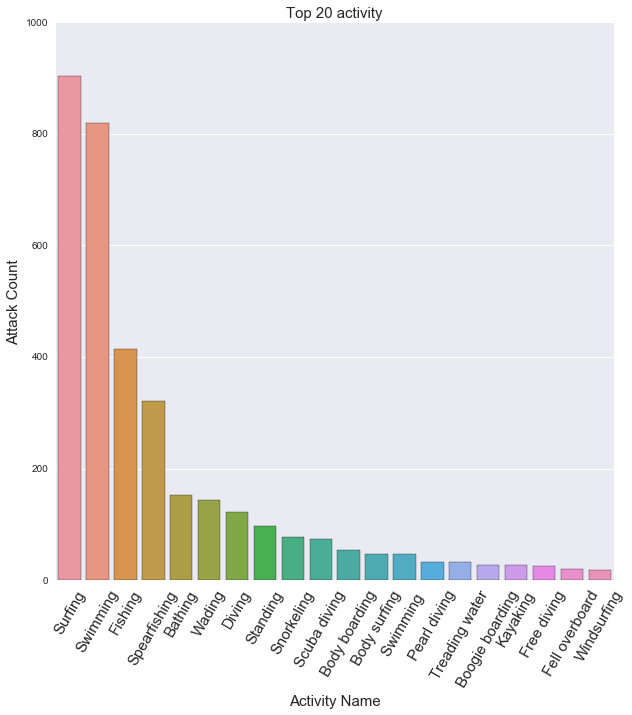

In [37]:
### top 20 activity
most_activities = Counter(df['Activity'].dropna().tolist()).most_common(20)
activity_name = [activity[0] for activity in most_activities]
attack_count = [activity[1] for activity in most_activities]

fg,ax = plt.subplots(figsize=(10,10))
sns.barplot(x=activity_name,y=attack_count,ax=ax)

ax.set(ylabel='Attack Count',xlabel='Activity Name')
ax.set_ylabel('Attack Count',fontsize=15)
ax.set_xlabel('Activity Name',fontsize=15)
plt.title('Top 20 activity',fontsize=15)
tikcs = plt.setp(ax.get_xticklabels(),rotation = 60,fontsize=15)

# Age 

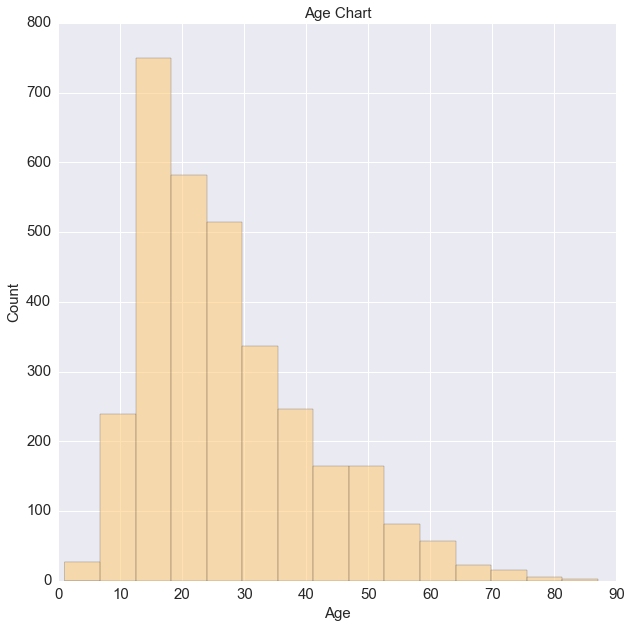

In [99]:
def age_process(age):
    try:
        age = int(age)
    except:
        age = 0
    if (age > 0 and age <= 100):
        return age
    else:
        return np.nan
df['Age'].fillna(0,inplace=True)
df['Age'] = df['Age'].apply(age_process)
fig,ax = plt.subplots(figsize=(10,10))
sns.distplot(df['Age'].dropna(),  
             hist_kws={"alpha": 0.6, "color": "#ffcc80"}, 
             kde=False, bins=15)
#ax.set(xlabel='Age',ylabel='Count')
ax.set_title('Age Chart',fontsize=15)
ax.set_ylabel('Count',fontsize=15)
ax.set_xlabel('Age',fontsize=15)
x_ticks = plt.setp(ax.get_xticklabels(),fontsize=15)
y_ticks = plt.setp(ax.get_yticklabels(),fontsize=15)

# Dates

In [73]:
month = ['Jan','Feb','Mar','Apr','May',
         'Jun','July','Aug','Sep','Oct','Nov','Dec']
month_number = ['01','02','03','04','05','06','07','08','09','10','11','12']

def process_date(date):
    if len(date)== 11 and date[2] =='-':
        for i in xrange(len(month)):
            date.replace(month[i],month_number[i])
        return date
    else:
        return np.nan

In [74]:
df['Date'] = df['Date'].apply(process_date)
## If ‘coerce’, then invalid parsing will be set as NaT
dates = pd.to_datetime(df['Date'],dayfirst=True, errors='coerce')

In [77]:
day = dates.dropna().map(lambda x:x.day)

In [83]:
day_counter = Counter(day)
day_keys = day_counter.keys()
day_values = day_counter.values()

In [85]:
month = dates.dropna().map(lambda x:x.month)

In [86]:
## convert month to season
def process_month(month):
    if month >=3 and month <=5 :
        return 'spring'
    elif month >=6 and month <=8:
        return 'summer'
    elif month >=9 and month <=11:
        return 'autumn'
    else:
        return 'winter'

In [88]:
month_labels = month.apply(process_month)
month_counter = Counter(month_labels) ## 計算次數
month_keys = month_counter.keys()
month_values = month_counter.values()

# Day

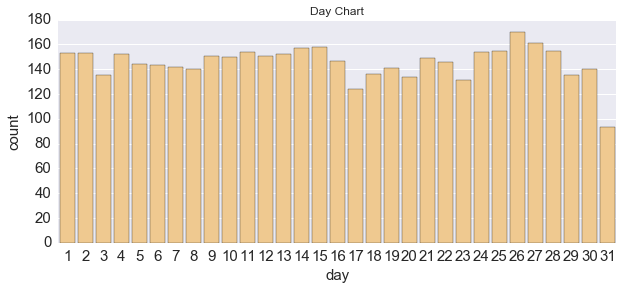

In [98]:
fig,ax = plt.subplots(figsize=(10,4))
sns.barplot(x=day_keys,y=day_values,ax=ax,color='#ffcc80')
#ax.set(ylabel='count',xlabel='day')
ax.set_ylabel('count',fontsize=15)
ax.set_xlabel('day',fontsize=15)
ticks = plt.setp(ax.get_xticklabels(),fontsize=15)
ticks = plt.setp(ax.get_yticklabels(),fontsize=15)
plt.title('Day Chart')

# Month

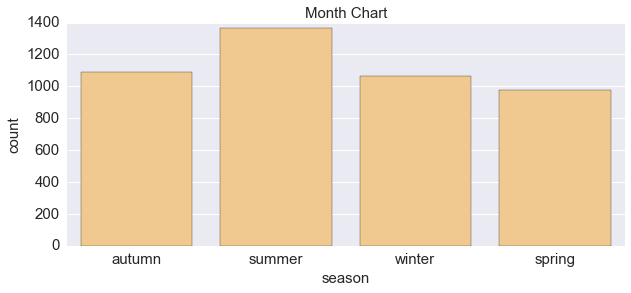

In [97]:
fig,ax = plt.subplots(figsize=(10,4))
sns.barplot(x=month_keys,y=month_values,ax=ax,color='#ffcc80')
ax.set_ylabel('count',fontsize=15)
ax.set_xlabel('season',fontsize=15)
#ax.set(ylabel='count',xlabel='season')
ticks = plt.setp(ax.get_xticklabels(),fontsize=15)
ticks = plt.setp(ax.get_yticklabels(),fontsize=15)
plt.title('Month Chart',fontsize=15)